> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Medical No-show appointments (Kaggle, 2016)]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

The dataset we are analyzing is titled "No-show appointments" and is sourced from Kaggle. It comprises information from 100k medical appointments in Brazil, focusing on whether patients attend their appointments. Each row contains various patient characteristics, including:

+ **PatientId**: Identifier for each patient.
+ **AppointmentID**: Identifier for each appointment.
+ **Gender**: Gender of the patient.
+ **ScheduledDay**: Date when the appointment was scheduled.
+ **AppointmentDay**: Date of the appointment.
+ **Age**: Age of the patient.
+ **Neighbourhood**: Location of the hospital.
+ **Scholarship**: Indicates whether the patient is enrolled in the Bolsa Família welfare program.
+ **Hipertension**: Indicates if the patient has hypertension.
+ **Diabetes**: Indicates if the patient has diabetes.
+ **Alcoholism**: Indicates if the patient has alcoholism.
+ **Handicap**: Indicates the level of handicap of the patient.
+ **SMS_received**: Indicates if the patient received an SMS reminder.
+ **No-show**: Indicates if the patient showed up for the appointment.

### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

The primary objective of this analysis is to uncover insights regarding factors influencing patient attendance at medical appointments. We aim to address the following research questions:

1. **What demographic factors influence appointment attendance?**
This question will explore how variables such as age, gender, and neighborhood affect the likelihood of patients showing up for their scheduled appointments.
2. **Does the receipt of SMS reminders affect appointment attendance?**
This question will investigate the effectiveness of SMS reminders in reducing the rate of no-show appointments.
By examining these questions, we aim to identify key factors associated with appointment attendance and provide insights that can help healthcare providers improve patient attendance rates.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Importing necessary libraries for data analysis and visualization.

# Import NumPy for numerical computations.
import numpy as np

# Import pandas for data manipulation and analysis.
import pandas as pd

# Import matplotlib and seaborn for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

# Set up matplotlib to display plots inline within the Jupyter Notebook.
%matplotlib inline

# It's essential to include a 'magic word' so that visualizations are plotted inline with the notebook.
# For more information on magic commands, refer to: http://ipython.readthedocs.io/en/stable/interactive/magics.html



In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

#### **Loading Data**:
- The dataset was loaded from a CSV file named 'noshowappointments-kagglev2-may-2016.csv'.

In [2]:
# Load Data and Initial Inspection:
#   The dataset was loaded from the CSV file 'noshowappointments-kagglev2-may-2016.csv'.
#   An initial exploration of the data was conducted to understand its structure and contents.
#   This step involved examining the first few rows of the dataset to get a sense of the variables and their values.

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# Dataset Size:

df.shape

(110527, 14)

- The shape of the dataset is (110527, 14), indicating it consists of 110,527 rows(samples) and 14 columns.

#### Data Types:
- The dataset contains a mixture of data types:

In [4]:
# Data Types:

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

- ScheduledDay and AppointmentDay data type should be changed from object(string) to datetime.

#### Duplicate Data:

In [5]:
# Duplicate Rows:
#   The duplicated() method was applied to the DataFrame 'df' to identify duplicate rows.
#   By calling the sum() function on the result, the total number of duplicate rows in the dataset was computed.

df.duplicated().sum()

0

- No duplicate rows were found in the dataset.

In [6]:
# Duplicate Patient IDs:
#   By applying the duplicated() method to this column and then using the sum() function, 
#   the total number of duplicated patient IDs was calculated.

df['PatientId'].duplicated().sum()

48228

In [7]:
# Duplicate Entries Based on Patient ID and No-show Status:
#   The duplicated() method was used with these specific columns as parameters.
#   The sum() function was then applied to count the total number of duplicate entries.

df.duplicated(['PatientId', 'No-show']).sum()

38710

- However, there are 48,228 duplicated patient IDs.
- Also, there are 38,710 duplicated combinations of 'PatientId' and 'No-show' columns.

#### Unique Values:
- The dataset has the following number of unique values for each column:

In [8]:
# Unique Values:
#   This analysis provides insight into the diversity and variation present in the dataset.
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

- **Multiple Appointments per Patients**: The presence of 62,299 unique Patient IDs, indicates that some patients had more than one appointment. While this information won't be covered in this project, it could potentially lead to further analysis, such as understanding patient behavior, appointment scheduling pattrens, or factors influencing repeat appointments.
- **Limited Variation in Appointments Days**: With only 27 Unique appointment days, it indicates that appointments are scheduled on a relatively small set of dates. This could be due to operational constraints, scheduling policies, or specific clinic availability. Further exploration into appointment distribution across these days might provide insights into peak appointment times, resource allocation, or potential sceduling bottlenecks.
- **Divese Neighbourhoods**: The dataset records from 81 unique neighbourhoods. This diversity in neighbourhoods could be significant in understanding regional variation in appointments attendance rates, healthcare access, or socio-economic factors influencing patient behavior. Analysing appointments by meighbourhoods might reveal disparities in healthcare utilization or highlight areas requiring targeted interventions or resources.

#### Data Summary:

In [9]:
# Dataset Information:
#   This includes details such as the data types of each column, the number of non-null entries, and memory usage.
#   Understanding this information is crucial for assessing data quality and potential memory constraints.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [10]:
# Descriptive Statistics:
#   This summary includes measures such as count, mean, standard deviation, minimum, and maximum values.
#   Analyzing these statistics offers insight into the distribution and central tendency of numerical variables.
#   Understanding these summary statistics is essential for detecting outliers, understanding data ranges, and identifying potential issues in the dataset.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


* The summary statistics of numerical columns are as follows: 
   - PatientId:
     * Mean: 1.474963e+14	
     * Standard Deviation: 2.560949e+14
     * Minimum: 3.921784e+04	
     * Maximum: 9.999816e+14
   - Age: 
     * Mean: 37.088874	
     * Standard Deviation: 23.110205	
     * Minimum: -1.000000	
     * Maximum: 115.000000
   - Other Variables: have binary values (0 or 1), with varying propotions of 1s across the dataset.

#### Data Wrangling Summary:
- The dataset appears to be relatively clean, with no missing values or duplicate rows.
- However, some columns, such as 'Age' and 'ScheduledDay', may require further scrutiny due to potential outliers (e.g., negative age values or inconsistencies in scheduling timestamps).
- The distribution of 'Handcap' values indicates there might be multiple levels of handicap status, with some patients having a handicap level of 4, which could be explored further.
- The presence of duplicated patient IDs suggests possible repeat appointments for certain individuals, which may need to be considered in the analysis.
- The 'No-show' column is likely a target variable for prediction or analysis, with two possible values: 'Yes' or 'No', indicating whether a patient missed their appointment.


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

#### Handling incorrect data:

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

# Identifying Negative Age Values:
#   This step aims to identify any instances of erroneous or invalid data entries, as negative ages are logically impossible.

negative_age = df[df['Age'] < 0]
negative_age 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [12]:
# Removing Records with Negative Age Values:
#   The index values of the subset 'negative_age' containing records with negative ages were used as the argument to drop these rows.
#   By setting inplace=True, the changes were made directly to the original DataFrame 'df'.
#   This step effectively eliminates erroneous data entries with negative age values from the dataset.

df.drop(negative_age.index, inplace=True)

In [13]:
# Updated Descriptive Statistics:
#   Following the removal of records with negative age values, the describe() method was again employed to generate descriptive statistics for the numerical columns in the DataFrame 'df'.
#   This updated summary provides insights into the distribution and central tendency of numerical variables after the cleaning step.
#   Analyzing these statistics allows for a more accurate understanding of the dataset's characteristics and helps ensure data quality for subsequent analysis.

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Renaming columns

In [14]:
# Renaming Columns:
#   The rename() method was utilized to rename specific columns in the DataFrame 'df' to improve readability and consistency.
#   - The column 'PatientId' was renamed to 'PatientID'.
df.rename(columns={'PatientId': 'PatientID'}, inplace=True)

#   - The column 'ScheduledDay' was renamed to 'Scheduled_Day'.
df.rename(columns={'ScheduledDay': 'Scheduled_Day'}, inplace=True)

#   - The column 'AppointmentDay' was renamed to 'Appointment_Day'.
df.rename(columns={'AppointmentDay': 'Appointment_Day'}, inplace=True)

In [15]:
#   - The column 'Hipertension' was renamed to 'Hypertension'.
df.rename(columns={'Hipertension': 'Hypertension'}, inplace=True)

#   - The column 'No-show' was renamed to 'No_show'.
df.rename(columns={'No-show': 'No_show'}, inplace=True)

#   These renaming operations were performed to ensure clarity and uniformity in column names, facilitating easier interpretation and analysis of the dataset.

In [16]:
# Displaying Updated DataFrame:
df.head(10)

,PatientID,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


#### Fixing Data Types

In [17]:
# Converting Date Columns to DateTime:
#   The pd.to_datetime() function was applied to the 'Scheduled_Day' and 'Appointment_Day' columns in the DataFrame 'df'.
#   This conversion transforms the data type of these columns from object to datetime, allowing for easier manipulation and analysis of dates.
#   Converting date columns to datetime format facilitates various date-related operations and calculations in subsequent analysis.

df['Scheduled_Day'] = pd.to_datetime(df['Scheduled_Day'])
df['Appointment_Day'] = pd.to_datetime(df['Appointment_Day'])

#### Changing columns values
- No_show column

In [18]:
# Checking the distribution of values in the 'No_show' column.
df.No_show.value_counts()

No     88207
Yes    22319
Name: No_show, dtype: int64

In [19]:
# Converting the 'No_show' column values to numerical format:
df.No_show = np.where(df.No_show == "Yes", 1, 0)
df.No_show.value_counts()

0    88207
1    22319
Name: No_show, dtype: int64

In [20]:
# Printing the data types of columns in the DataFrame.
# Displaying the first 3 rows of the DataFrame to inspect the changes.

print(df.dtypes)
df.head(3)

PatientID                 float64
AppointmentID               int64
Gender                     object
Scheduled_Day      datetime64[ns]
Appointment_Day    datetime64[ns]
Age                         int64
Neighbourhood              object
Scholarship                 int64
Hypertension                int64
Diabetes                    int64
Alcoholism                  int64
Handcap                     int64
SMS_received                int64
No_show                     int64
dtype: object


,PatientID,AppointmentID,Gender,Scheduled_Day,Appointment_Day,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Impact of Demographic Factors on Appointment Attendence)

#### How do demographic factors such as age, gender, and, neighborhood influence the likelihood of patients showing up for their scheduled appointments? 

#### Single-variable Exploration:

**1. Age**

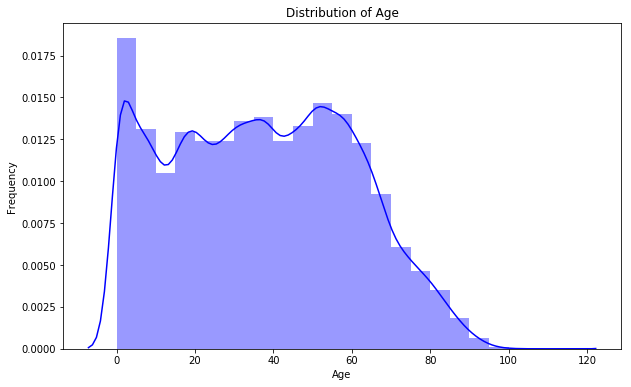

In [21]:
# Define custom bin edges
age_bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]

# Plot the distribution of age with custom bins
plt.figure(figsize=(10, 6))
sns.distplot(df['Age'], bins=age_bins, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


- **High Appointment Rates for Children (Aged 0-5)**: The highest peak in appointment frequency occurs in the age group of 0-5 years, indicating a high attendance rate among young children. This suggests that parents or caregivers are diligent in bringing their young children to appointments.
- **Moderate Appointment Rates for Young Adults (Aged 15-20)**: The fourth highest peak is observed in the age group of 15-20 years. This age group likely consists of teenagers and young adults who may have varying levels of responsibility for attending appointments independently.
- **Decrease in Appointment Rates for Older Adults**: The plot shows a decrease in appointment frequency among older adults, particularly those aged 65 and above. This could be due to various factors such as health issues, mobility constraints, or a lower frequency of medical appointments.
- **Low Appointment Rates for Adolescents (Aged 10-15)**: A dip in appointment frequency is observed in the age group of 10-15 years. This age range coincides with the transition from childhood to adolescence, where individuals may begin to assert more independence and responsibility for their healthcare.

**2. Gender**

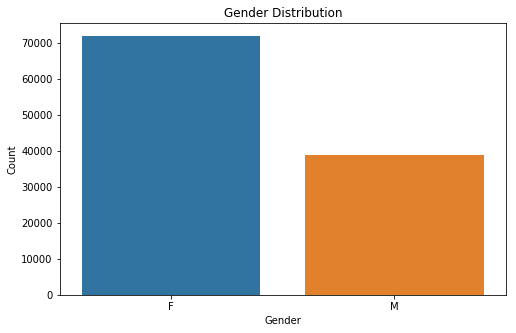

In [22]:
def plot_count_distribution(data, x, title, xlabel):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=x, data=data)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.show()

# Plotting the distribution of gender in the dataset
plot_count_distribution(df, 'Gender', 'Gender Distribution', 'Gender')


- **Higher Appointment Rates for Females**: The countplot reveals that the number of appointments made by females significantly exceeds those made by males. This suggests that females tend to seek medical care or attend appointments more frequently than males.

**3. Neighbourhooods**

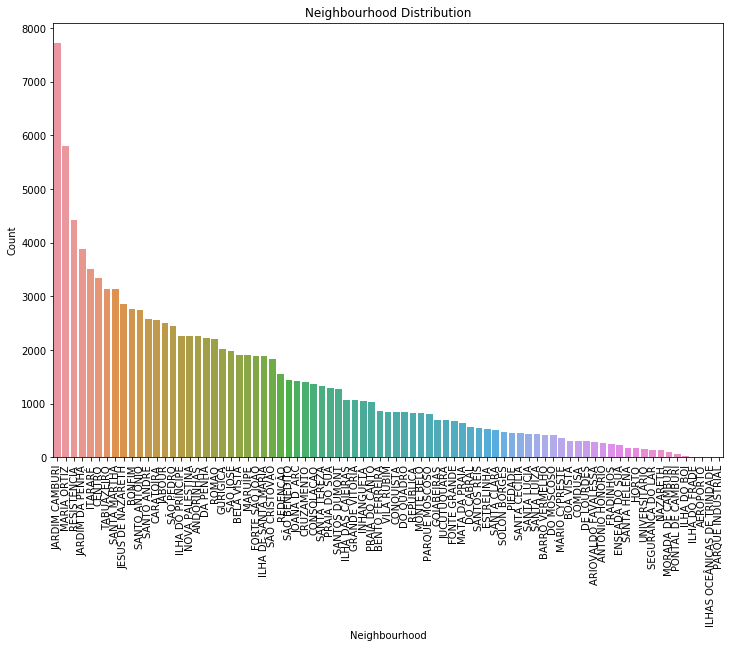

In [23]:
# Plotting the distribution of neighborhoods in the dataset.
plt.figure(figsize=(12, 8))
sns.countplot(x='Neighbourhood', data=df, order=df['Neighbourhood'].value_counts().index)
plt.title('Neighbourhood Distribution')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

- Note: as this plot is quite extensive due to 81 unique neighbourhoods, I decided to select the top 15 neighbourhoods by frequency of appointments rate.(see below)

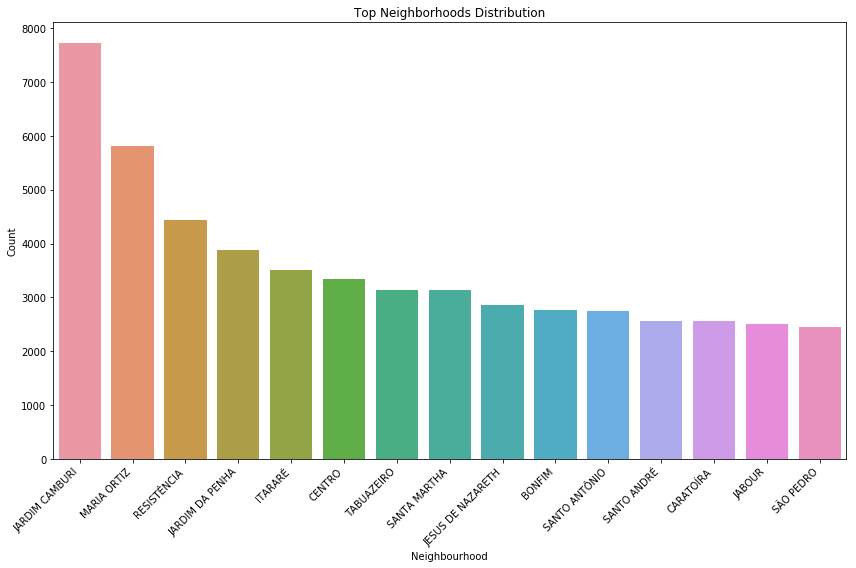

In [24]:
# Select top 15 neighborhoods by frequency
top_neighborhoods = df['Neighbourhood'].value_counts().nlargest(15).index

# Filter DataFrame to include only top neighborhoods
df_top_neighborhoods = df[df['Neighbourhood'].isin(top_neighborhoods)]

# Plotting the distribution of the top neighborhoods.
plt.figure(figsize=(12, 8))
sns.countplot(x='Neighbourhood', data=df_top_neighborhoods, order=top_neighborhoods)
plt.title('Top Neighborhoods Distribution')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


- **Wide Variation in Appointment Counts**: The countplot of the top 15 neighborhoods reveals significant variation in appointment counts, with some neighborhoods having substantially higher appointment numbers than others. This suggests that appointment attendance may be influenced by factors related to neighborhood demographics, accessibility to healthcare facilities, or socioeconomic status.
- **Jardim Camburi Neighborhood Has Highest Appointment Count**: Among the top 15 neighborhoods, Jardim Camburi stands out with the highest appointment count, indicating a higher demand for healthcare services or a larger population within that area. This neighborhood may warrant further investigation to understand the factors contributing to its high appointment attendance.
- **Sao Pedro Neighborhood Has Lowest Appointment Count**: Conversely, Sao Pedro has the lowest appointment count among the top 15 neighborhoods, suggesting potential disparities in healthcare access or utilization within this community. Understanding the reasons behind the lower appointment attendance in Sao Pedro could help identify barriers to healthcare access and inform targeted interventions to improve healthcare utilization in underserved areas.
- **Implications for Healthcare Resource Allocation**: The variation in appointment counts across neighborhoods underscores the importance of equitable resource allocation in healthcare delivery. Healthcare providers and policymakers should consider neighborhood-level differences in healthcare access and utilization when allocating resources and planning healthcare services to ensure that all communities receive adequate support.

#### Multiple-variable Exploration:

**1. Relationship between Age and Attendance**

In [25]:
# Calculating summary statistics for age grouped by attendance status.
age_summary = df.groupby('No_show')['Age'].describe()
age_summary

,count,mean,std,min,25%,50%,75%,max
No_show,,,,,,,,
0,88207.0,37.790504,23.338645,0.0,18.0,38.0,56.0,115.0
1,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


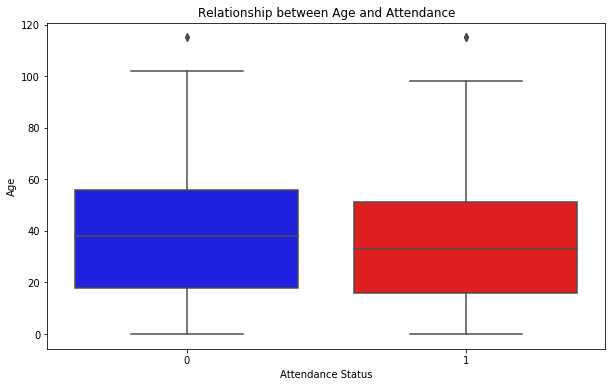

In [26]:
# Create a box plot to visualize the relationship between age and attendance status
plt.figure(figsize=(10, 6))
sns.boxplot(x='No_show', y='Age', data=df, palette=['blue', 'red'])
plt.title('Relationship between Age and Attendance')
plt.xlabel('Attendance Status')
plt.ylabel('Age')
plt.show()

- **Similar Age Distribution**: Both show and no-show appointments exhibit similar patterns in age distribution, as indicated by the boxplot. The median age for both attendance statuses is around 38 years, with a slightly lower median age for no-show appointments (33 years).
- **Variability in Age**: There is variability in age within both attendance statuses, as shown by the interquartile range (IQR) in the boxplot and the standard deviation in the statistical summary. This variability suggests that age alone may not be a strong predictor of appointment attendance.
- **Outliers**: Both show and no-show appointments have outliers in terms of age, as depicted by the points outside the whiskers in the boxplot. These outliers represent individuals with ages significantly higher or lower than the majority of the population.
- **Overall Age Distribution**: The age distribution for both attendance statuses ranges from 0 to 115 years, covering a wide range of ages. This indicates that appointments are attended or missed across various age groups.
- **Median Age Difference**: While the median age for show appointments is slightly higher than that for no-show appointments, the difference is not substantial. This suggests that age alone may not be a significant factor in determining appointment attendance.

**2. Appointment Attendance by Gender**

In [27]:
# Calculate appointment counts by gender and attendance status
gender_attendance_counts = df.groupby(['Gender', 'No_show']).size().unstack()

# Display the extracted information
gender_attendance_counts


No_show,0,1
Gender,,
F,57245,14594
M,30962,7725


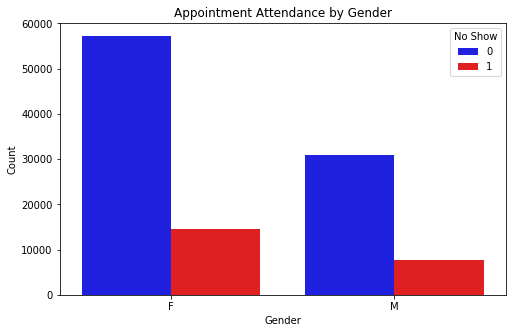

In [28]:
# Create a countplot to visualize appointment attendance by gender
# The hue parameter is set to 'No_show', allowing us to differentiate between show and no-show appointments
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', hue='No_show', data=df, palette=['blue', 'red'])
plt.title('Appointment Attendance by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='No Show')
plt.show()

- **Higher Appointment Counts for Females**: The countplot shows that females tend to have a higher overall number of appointments compared to males. This observation is further supported by the extracted information, which indicates that the count of appointments for females (both show and no-show) is substantially higher than that for males.
- **Proportion of No-Shows**: While females have a higher overall number of appointments, they also have a higher count of no-show appointments compared to males. The countplot and the extracted information reveal that the proportion of no-show appointments (indicated by the '1' category) is higher among females compared to males.
- **Gender Disparity in Appointment Attendance**: There is a notable gender disparity in appointment attendance, with females exhibiting both higher attendance rates (show appointments) and higher rates of no-shows compared to males.
- **Potential Factors Influencing Gender Disparity**: The observed gender disparity in appointment attendance may be influenced by various factors such as differences in healthcare-seeking behavior, social and cultural norms, accessibility to healthcare services, and scheduling preferences.
- **Implications for Healthcare Delivery**: Healthcare providers should consider the gender-specific patterns in appointment attendance when designing appointment scheduling systems, implementing reminder strategies, and addressing barriers to healthcare access. Tailored approaches that account for gender differences can help improve appointment attendance and overall healthcare outcomes.

**3. Relationship between Top Nrighbourhoods and Attendance**

In [29]:
# Calculate appointment counts by neighborhood and attendance status
neighborhood_attendance_counts = df_top_neighborhoods.groupby(['Neighbourhood', 'No_show']).size().unstack()

# Display the extracted information
neighborhood_attendance_counts


No_show,0,1
Neighbourhood,,
BONFIM,2223,550
CARATOÍRA,1974,591
CENTRO,2631,703
ITARARÉ,2591,923
JABOUR,2058,451
JARDIM CAMBURI,6252,1465
JARDIM DA PENHA,3246,631
JESUS DE NAZARETH,2157,696
MARIA ORTIZ,4586,1219


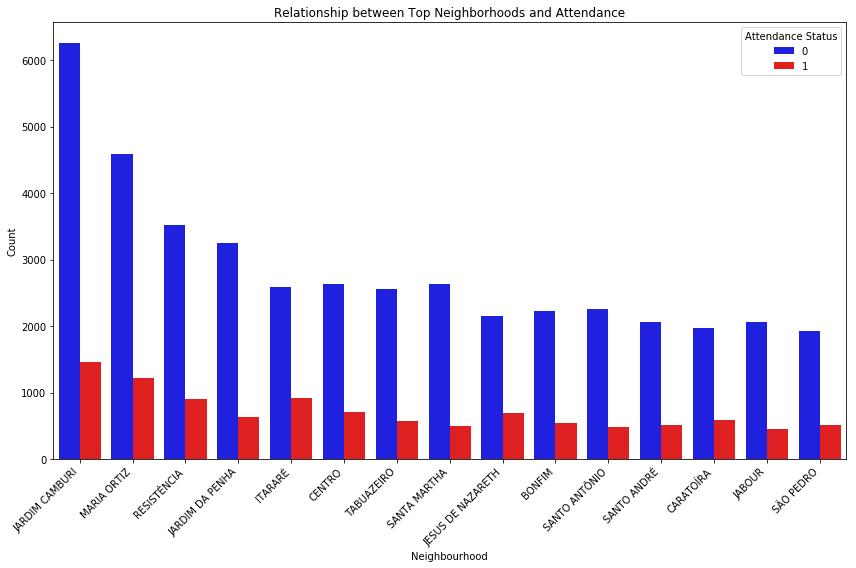

In [30]:
# Create a countplot to visualize appointment attendance by neighborhood for the top 15 neighborhoods
plt.figure(figsize=(12, 8))
sns.countplot(x='Neighbourhood', hue='No_show', data=df_top_neighborhoods, order=top_neighborhoods, palette=['blue', 'red'])
plt.title('Relationship between Top Neighborhoods and Attendance')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Attendance Status')
plt.tight_layout()
plt.show()

- **Variation in Appointment Counts**: The countplot and the extracted information show variation in appointment counts across different top neighborhoods. Some neighborhoods have higher overall appointment counts, while others have relatively lower counts.
- **No-Show Appointment Counts**: There is a noticeable difference in the counts of no-show appointments (indicated by the '1' category) across different neighborhoods. Some neighborhoods have higher proportions of no-show appointments compared to others.
- **Jardim Camburi Neighborhood**: Jardim Camburi stands out with the highest overall appointment count among the top neighborhoods. Despite having a high number of appointments, it also has a relatively higher count of no-show appointments compared to some other neighborhoods.

### Research Question 2  (Effectiveness of Reminder Systems)

#### What is the effectiveness of SMS reminders in reducing the rate of no show appointments? 

#### Single-variable Exploration:
**1. Appointment Attendance**

In [31]:
# Calculate the count of appointments for each attendance status
attendance_counts = df['No_show'].value_counts()

# Display the extracted information
print("Appointment Attendance Counts:")
attendance_counts


Appointment Attendance Counts:


0    88207
1    22319
Name: No_show, dtype: int64

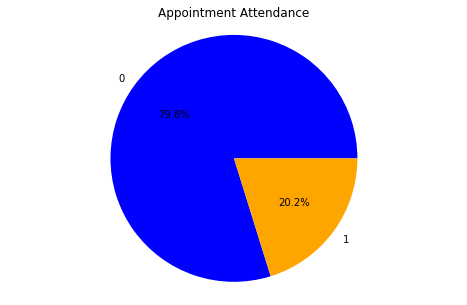

In [32]:
# Create a pie chart to visualize the distribution of appointment attendance
# The attendance_counts variable stores the count of show and no-show appointments
plt.figure(figsize=(8, 5))
attendance_counts = df['No_show'].value_counts()
plt.pie(attendance_counts, labels=attendance_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Appointment Attendance')
plt.axis('equal')
plt.show()

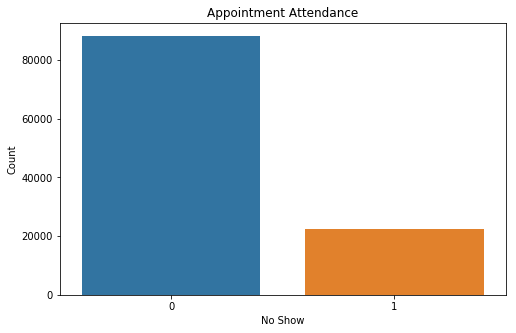

In [33]:
# Create a countplot to visualize the distribution of appointment attendance
plot_count_distribution(df, 'No_show', 'Appointment Attendance', 'No Show')


- **Overall Appointment Attendance Rate**: The pie chart shows that approximately 79.8% of appointments result in patients showing up ("show"), while about 20.2% of appointments result in patients not showing up ("no-show"). This indicates that the majority of appointments are attended as opposed to being missed.
- **Implications for Healthcare Providers**: Understanding the distribution of appointment attendance is crucial for healthcare providers in optimizing appointment scheduling, resource allocation, and implementing targeted interventions to reduce the rate of missed appointments. The insights gained from these visualizations can inform strategies to improve appointment attendance and overall healthcare delivery.

**2. Distribution of SMS Received**

In [34]:
# Calculate the count of appointments for each category of SMS received
sms_received_counts = df['SMS_received'].value_counts()

# Display the extracted information
print("Distribution of SMS Received:")
sms_received_counts


Distribution of SMS Received:


0    75044
1    35482
Name: SMS_received, dtype: int64

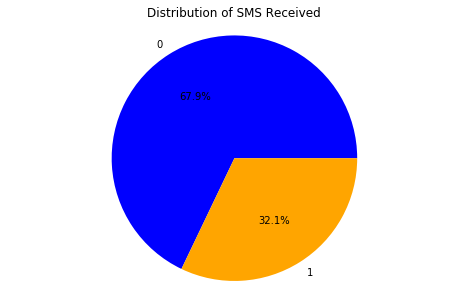

In [35]:
# Create a pie chart to visualize the distribution of SMS received
# The sms_received_counts variable stores the count of SMS received, obtained using value_counts() on the 'SMS_received' column
plt.figure(figsize=(8, 5))
sms_received_counts = df['SMS_received'].value_counts()
plt.pie(sms_received_counts, labels=sms_received_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Distribution of SMS Received')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

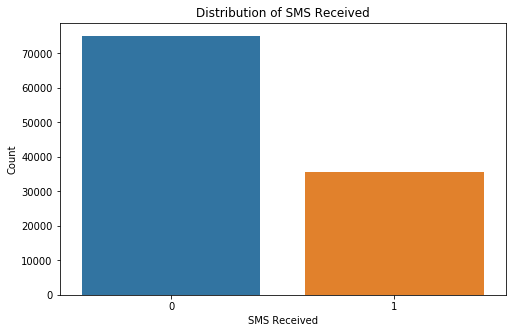

In [36]:
# Create a countplot to visualize the distribution of SMS received

plot_count_distribution(df, 'SMS_received', 'Distribution of SMS Received', 'SMS Received')

- **SMS Received Distribution**: The pie chart shows that approximately 67.0% of appointments did not receive an SMS reminder, while about 32.1% of appointments received an SMS reminder. This indicates that a significant portion of appointments did not receive SMS reminders.
- **Implications for Reminder Systems**: Understanding the distribution of SMS received is crucial for evaluating the effectiveness of reminder systems in reducing the rate of missed appointments. The insights gained from these visualizations can inform strategies to optimize the implementation of SMS reminders and improve appointment attendance rates.

#### Multiple-variable Exploration:

**1. Appointment Attendance by SMS Reminder**

In [37]:
# Calculate the count of appointments for each combination of SMS received and attendance status
sms_attendance_counts = df.groupby(['SMS_received', 'No_show']).size().unstack()

# Display the extracted information
print("Appointment Attendance by SMS Reminder:")
sms_attendance_counts


Appointment Attendance by SMS Reminder:


No_show,0,1
SMS_received,,
0,62509,12535
1,25698,9784


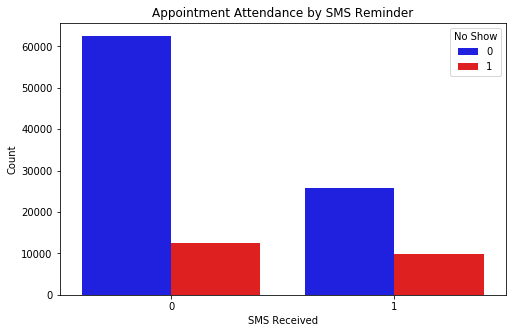

In [38]:
# Create a countplot to visualize appointment attendance by SMS reminder
plt.figure(figsize=(8, 5))
sns.countplot(x='SMS_received', hue='No_show', data=df, palette=['blue', 'red'])
plt.title('Appointment Attendance by SMS Reminder')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(title='No Show')
plt.show()

- **Attendance Patterns with SMS Reminder**: The countplot illustrates the distribution of appointment attendance based on whether an SMS reminder was received. It shows that a higher proportion of appointments without an SMS reminder result in patients showing up (No_show = 0), compared to appointments with an SMS reminder. This is indicated by the higher count of No_show = 0 for SMS not received (62509) compared to SMS received (25698).
- **Effectiveness of SMS Reminders**: While SMS reminders are intended to reduce the rate of missed appointments, the countplot suggests that they may not be significantly effective in ensuring attendance. Despite receiving SMS reminders, a considerable number of appointments still result in patients not showing up (No_show = 1). This is evident from the relatively high count of No_show = 1 for both SMS not received (12535) and SMS received (9784).
- **Implications for Reminder Systems**: The analysis highlights the importance of evaluating the effectiveness of SMS reminder systems in healthcare settings. It suggests the need for further investigation into factors influencing appointment attendance and the potential improvement of reminder systems to enhance attendance rates.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed in relation to the question(s) provided at the beginning of the analysis. Summarize the results accurately, and point out where additional research can be done or where additional information could be useful.

> **Tip**: Make sure that you are clear with regards to the limitations of your exploration. You should have at least 1 limitation explained clearly. 

> **Tip**: If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

In conclusion, the exploratory data analysis (EDA) conducted to address the research questions has provided valuable insights into the factors influencing appointment attendance and the effectiveness of SMS reminders in reducing the rate of no-show appointments.

**Research Question 1: Impact of Demographic Factors on Appointment Attendance**

1. *Age*: The analysis revealed varying appointment rates across different age groups, with higher attendance observed among young children and a decrease in attendance among older adults. However, age alone may not be a strong predictor of appointment attendance.

2. *Gender*: Females tend to have higher appointment rates compared to males, suggesting differences in healthcare-seeking behavior between genders. Despite higher appointment rates among females, they also exhibit a higher proportion of no-show appointments.

3. *Neighborhoods*: Significant variation in appointment counts across neighborhoods indicates potential disparities in healthcare access or utilization. Further investigation into neighborhood-specific factors can inform targeted interventions to improve healthcare utilization.

**Research Question 2: Effectiveness of Reminder Systems**

1. *Overall Appointment Attendance*: The majority of appointments (79.8%) result in patients showing up, highlighting the importance of understanding appointment attendance patterns for healthcare providers to optimize resource allocation and appointment scheduling.

2. *Distribution of SMS Received*: Approximately 67.0% of appointments did not receive an SMS reminder, indicating room for improvement in reminder system implementation. Despite SMS reminders, a considerable proportion of appointments still result in patients not showing up.

The analysis underscores the importance of evaluating the effectiveness of reminder systems and considering demographic factors and neighborhood-specific dynamics in healthcare delivery. However, it's important to note that the analysis is limited to descriptive statistics and visualizations, and further research incorporating statistical tests and causal inference methods would be necessary to establish causal relationships and draw definitive conclusions. Additionally, the dataset may not capture all relevant factors influencing appointment attendance, highlighting the need for additional data sources and information to inform comprehensive analyses.



## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [39]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

### References

- https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet
- https://www.kaggle.com/datasets/joniarroba/noshowappointments
